The [Rössler system](https://en.wikipedia.org/wiki/R%C3%B6ssler_attractor) is a three-dimensional continuous-time nonlinear dynamical system with chaotic dynamics similar to the Lorenz system. The equations of motion are,

$$\begin{aligned} \frac{dx}{dt} & = -y - z \\ \frac{dy}{dt} & = x + ay \\ \frac{dz}{dt} & = b + z(x-c) \end{aligned}$$

1. Compute a trajectory of the Rössler system with the default parameters in DynamicalSystems.jl and plot the attractor in the $x-y$, $x-z$, and $y-z$ planes.

In [1]:
using DynamicalSystems, CairoMakie

In [2]:
ds = Systems.roessler()
Δt = 0.05
tr = trajectory(ds, 1000.0; Ttr = 100.0, Δt)

3-dimensional Dataset{Float64} with 20001 points
 -2.09447    -7.64973  0.0233254
 -1.70879    -7.82223  0.0242817
 -1.31498    -7.97686  0.0253393
 -0.913946   -8.11308  0.0265108
 -0.506637   -8.23035  0.0278107
 -0.0940178  -8.3282   0.029256
  0.322923   -8.40618  0.0308669
  0.743173   -8.4639   0.032667
  1.1657     -8.50103  0.0346847
  1.58945    -8.51727  0.0369522
  2.01337    -8.51236  0.0395094
  2.43638    -8.48612  0.0424037
  2.85738    -8.43841  0.0456915
  ⋮                    
 -5.75808     5.03683  0.0186858
 -6.00477     4.79187  0.0180546
 -6.23883     4.53236  0.0175393
 -6.45953     4.25881  0.017106
 -6.6662      3.97177  0.0167337
 -6.85817     3.67183  0.0164094
 -7.03482     3.3596   0.0161244
 -7.19555     3.03576  0.0158737
 -7.3398      2.701    0.0156534
 -7.46704     2.35605  0.0154612
 -7.57679     2.00168  0.0152951
 -7.6686      1.63868  0.0151538

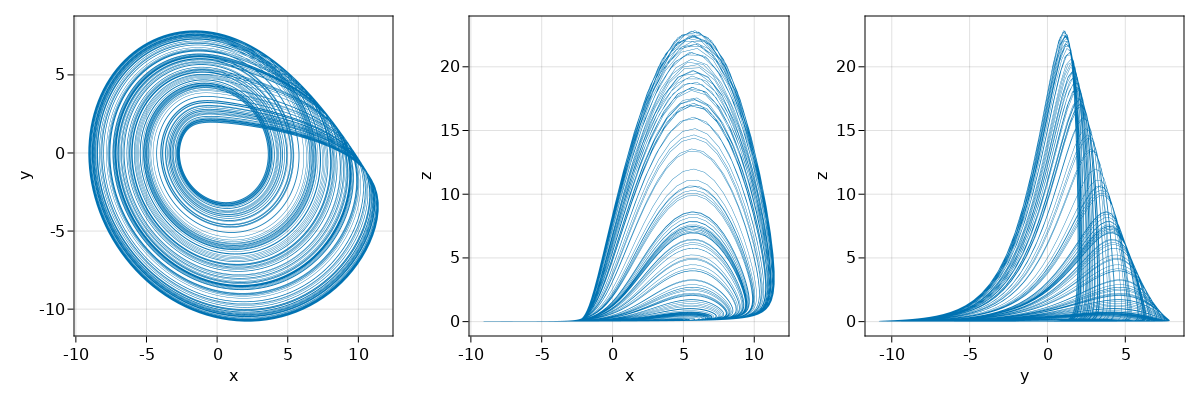

In [3]:
fig = Figure(resolution = (1200, 400))
lines!(Axis(fig[1, 1], xlabel = "x", ylabel = "y"), tr[:, 1], tr[:, 2], linewidth=0.4)
lines!(Axis(fig[1, 2], xlabel = "x", ylabel = "z"), tr[:, 1], tr[:, 3], linewidth=0.4)
lines!(Axis(fig[1, 3], xlabel = "y", ylabel = "z"), tr[:, 2], tr[:, 3], linewidth=0.4)
fig

2. Create a one-dimensional time series from this trajectory by keeping only the first dimension.

In [4]:
timeseries_1d = tr[:, 1]

20001-element Vector{Float64}:
 -2.0944713382909828
 -1.708788942391134
 -1.3149763479788954
 -0.9139456384980004
 -0.5066372998914521
 -0.09401781923133642
  0.3229226974102572
  0.7431725003802263
  1.1656997248810939
  1.5894548384473852
  2.013373664752014
  2.436378652590657
  2.857380963543065
  ⋮
 -5.758076584893367
 -6.004773692032064
 -6.23882832845867
 -6.4595306762256515
 -6.666195895094828
 -6.85816664432925
 -7.0348153874300365
 -7.195546327858553
 -7.33979752988384
 -7.467042520901078
 -7.5767922718220175
 -7.6685965373999885

3. Given your one-dimensional time series, use the `pecuzal_embedding` routine from DynamicalSystems.jl to estimate the optimal embedding dimension and delays for the Rössler system.

In [5]:
theiler = estimate_delay(timeseries_1d, "mi_min")  # Estimate a Theiler window
Y, τ_vals, ts_vals, Ls, εs = pecuzal_embedding(timeseries_1d, w = theiler)

println()
println("Optimal τ_vals = ", τ_vals)

Initializing PECUZAL algorithm for univariate input...
Starting 1-th embedding cycle...
Starting 2-th embedding cycle...
Starting 3-th embedding cycle...
Algorithm stopped due to increasing L-values. VALID embedding achieved ✓.

Optimal τ_vals = [0, 29, 14]


4. Use the optimal embedding to estimate the Lyapunov exponent of the Rössler system using the methods `lyapunov_from_data` and `linear_region`, as shown in the lecture. Remember to plot $E(k) - E(0)$ versus $k \times \Delta t$. How does your estimate compare to the true Lyapunov exponent? Discuss your answer.

In [6]:
Δt = 0.05
tr = trajectory(ds, 20000.0; Ttr = 100.0, Δt)      # Use a longer trajectory than before
timeseries_1d = tr[:, 1]                           # Synthetic one-dimensional time series
data_embedded = embed(timeseries_1d, 3, [29, 14])  # Use the optimal embedding from the previous step

3-dimensional Dataset{Float64} with 399972 points
 -2.09447    8.63258  3.68898
 -1.70879    8.82656  4.09737
 -1.31498    8.99658  4.49932
 -0.913946   9.14112  4.89374
 -0.506637   9.25849  5.27951
 -0.0940178  9.34682  5.65551
  0.322923   9.40402  6.02063
  0.743173   9.42777  6.37377
  1.1657     9.41547  6.71381
  1.58945    9.36427  7.03963
  2.01337    9.27112  7.35013
  2.43638    9.13286  7.64418
  2.85738    8.94641  7.92063
  ⋮                   
  4.36235    7.64374  8.43283
  4.73513    7.29076  8.59207
  5.09946    6.90007  8.72781
  5.4543     6.47578  8.83874
  5.79859    6.02329  8.92348
  6.1313     5.54907  8.98051
  6.45138    5.06021  9.0082
  6.75781    4.56391  9.0048
  7.04954    4.06697  8.96847
  7.32554    3.57522  8.89727
  7.58478    3.09325  8.78926
  7.82621    2.6242   8.64256

In [7]:
"""Helper function to compute the Lyapunov exponent and plot k x Δt versus E(k) - E(0)."""
function estimate_lyapunov(data, ks, Δt)    
    E = lyapunov_from_data(data, ks)   # Returns [E(k) for k ∈ ks]
    t = ks .* Δt
    (ind1, ind2), λ = linear_region(t, E)
    
    println("Identified linear region between t = ", t[ind1], " and t = ", t[ind2])
    println("Estimated Lyapunov exponent λ = ", round(λ, digits = 3))
    
    # Plotting
    xlim = maximum(ks .* Δt)
    ylim = maximum(E .- E[1])
    xticks = 0:ks.step:xlim
    yticks=0:1:ylim
    fig = Figure(figsize=(500,500))
    ax = Axis(fig[1, 1]; xlabel="k x Δt", ylabel="E(k) - E(0)", xticks, yticks)
    lines!(ax, ks .* Δt, E .- E[1], label = "λ=$(round(λ, digits = 3))")
    axislegend(ax, position = :rb)
    fig
end

estimate_lyapunov

Identified linear region between t = 7.4 and t = 8.1
Estimated Lyapunov exponent λ = 0.182


┌ Warning: Found linear region spans less than a 3rd of the available x-axis and might imply inaccurate slope or insufficient data. Recommended: plot `x` vs `y`.
└ @ ChaosTools /home/alistair/.julia/packages/ChaosTools/PHPDF/src/dimensions/linear_regions.jl:143


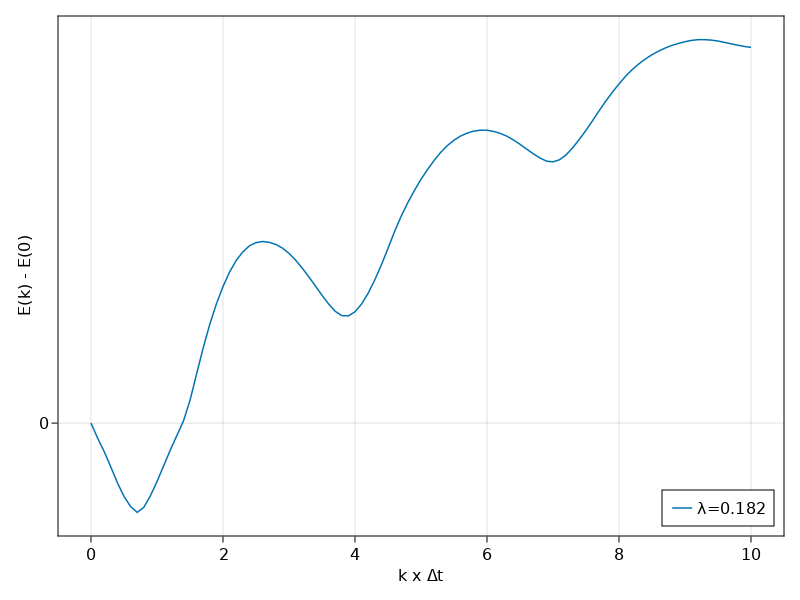

In [8]:
estimate_lyapunov(data_embedded, 0:2:200, Δt)

Observations:
1. The curve is nowhere linear.
2. The automatically identified "linear region" is extremely small and occurs on a steep part of the curve, potentially resulting in an overestimate of the Lyapunov exponent.
3. It is not clear that the curve saturates, suggesting that the range of $k$ may be too short.

Let's check the actual Lyapunov exponent for this system, just to compare.

In [9]:
lyapunov(ds, 10000, Ttr = 100)

0.070466664426337

So our initial estimate was indeed far too high. Let's try significantly increasing the range of $k$.

Identified linear region between t = 77.0 and t = 80.5
Estimated Lyapunov exponent λ = 0.036


┌ Warning: Found linear region spans less than a 3rd of the available x-axis and might imply inaccurate slope or insufficient data. Recommended: plot `x` vs `y`.
└ @ ChaosTools /home/alistair/.julia/packages/ChaosTools/PHPDF/src/dimensions/linear_regions.jl:143


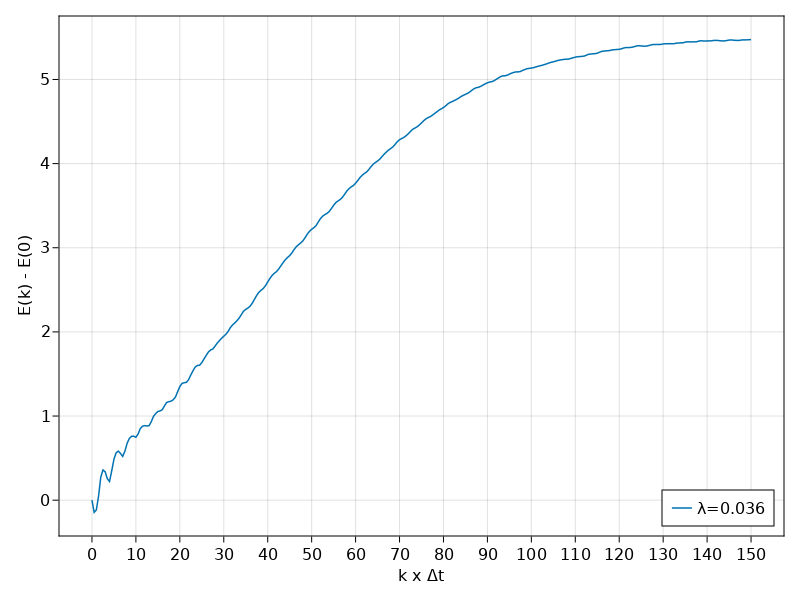

In [10]:
estimate_lyapunov(data_embedded, 0:10:3000, Δt)

Observations:
1. We now see the expected saturation behaviour, albeit after much more time has elapsed than for the Lorenz system, which we studied in the lecture. This already tells us that the Lyapunov exponent for this system is likely to be significantly smaller.
2. The identified "linear region" is once again extremely small, suggesting the algorithm struggled. The linear region also occurs *after* the curve appears to have started saturating, which probably explains the fact that the Lyapunov exponent is now underestimated.
3. Inspecting the curve, it does appear approximately linear until about $t = 50s$.

What if we estimate the slope of the linear part of the curve manually? By inspection, we see that the curve intersects the line $t = 50$ at approximately $E(k) - E(0) = 3.25$. The slope is then approximately equal to $3.25 / 50 = 0.065$, which isn't far off the actual Lyapunov exponent of $0.07$.

So the method still appears valid, even if the automated identification of the linear region fails in some cases.